# Curse of Dimensionality

This notebook demonstrates the curse of dimensionality.

## Distances

We will look at pair-wise distances between normally-distributed vectors in k-dimensional spaces.

### Visual Comparison

First let's take a quick look at data distribution in 2D space and 3D space.  

In [17]:
%matplotlib inline
from lib import YouTube
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import sklearn.preprocessing

def sample(dim, count=500):
    """Generate data sample."""
    return np.random.normal(0, 1, (count, dim))

def scatter2d(data):
    """Show 2D scatter plot."""
    fig = plt.figure(figsize=(5, 5), dpi=80)
    axes = fig.gca()
    axes.set_aspect('equal', adjustable='box')
    axes.scatter(data[:, 0], data[:, 1], alpha=0.5)

def scatter3d(data):
    """Show 3D scatter plot."""
    fig = plt.figure(figsize=(8, 8), dpi=80)
    axes = fig.add_subplot(projection='3d')
    axes.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.5)

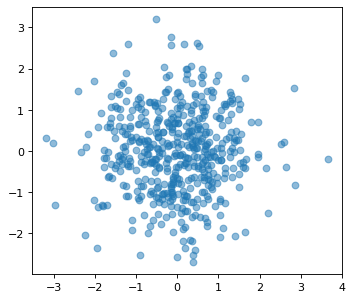

In [2]:
scatter2d(sample(2, 500))

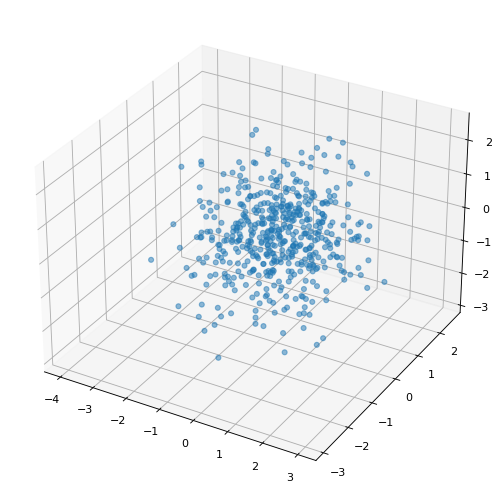

In [3]:
scatter3d(sample(3, 500))

Even with this simplistic experiment we can already see, that the cloud of points in the 3D space is vsually more sparse.

### Distance Distribution

In [40]:
def distances(data):
    """Get pairwise distances."""
    result = []
    for i in range(len(data) - 1):
        for j in range(i + 1, len(data)):
            result.append(np.linalg.norm(data[i] - data[j]))
    return np.array(result)

def draw_distributions(dims, **kwargs):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    axes = fig.gca()
    for n_dims in dims: 
        axes.hist(distances(sample(n_dims)), bins=50, alpha=0.5, label=f"{n_dims}D")
    axes.legend()
    axes.set_xlabel("distance")
    return fig

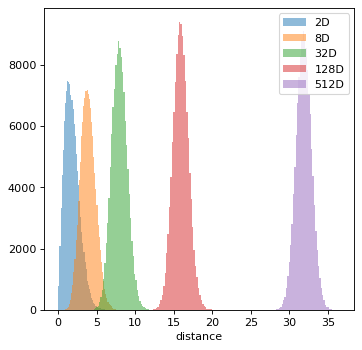

In [41]:
fig = draw_distributions([2, 8, 32, 128, 512])

As we can see with the growth of dimensionality the average distances between the data points grow as well.

The length of the vectors grows as well as $\sqrt{n}$. So may be what we're seeing is just a mere scaling and no significant statistical property of the data actually changes?

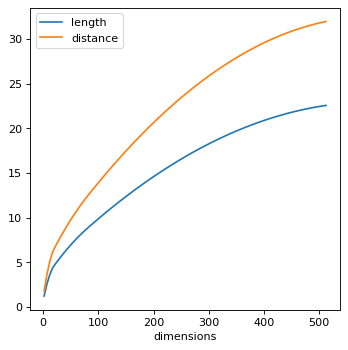

In [38]:
from scipy.interpolate import interp1d

def lengths(data):
    """Get the average length for the given dimensions."""
    return np.linalg.norm(data, axis=1)

def avg_len(n_dims, count=500):
    """Get average length for the given number of dimension."""
    return np.mean(lengths(sample(n_dims, count)))

def avg_dist(n_dims, count=500):
    """Get average distances for the given number of dimensions."""
    return np.mean(distances(sample(n_dims, count)))

def draw_dist_len(dims, count=500, points=100):
    """Draw dimensions and length plot."""
    lens = np.array([avg_len(n_dim, count) for n_dim in dims])
    dists = np.array([avg_dist(n_dim, count) for n_dim in dims])
    
    x = np.linspace(dims.min(), dims.max(), num=points, endpoint=True)
    smooth_lens = interp1d(dims, lens,  kind='quadratic', fill_value="extrapolate")
    smooth_dists = interp1d(dims, dists, kind='quadratic', fill_value="extrapolate")
    
    fig = plt.figure(figsize=(5, 5), dpi=80)
    axes = fig.gca()
    axes.plot(x, smooth_lens(x), label="length")
    axes.plot(x, smooth_dists(x), label="distance")
    axes.legend()
    axes.set_xlabel("dimensions")
    return fig

fig = draw_dist_len(np.array([2, 8, 32, 128, 512]))

Unfortunatelly that's not true.  We can also show that the relative distances between the vetctors become more and more the same. __At hight dimensions all datapoints are essentially in the same distance from each other!__ This could be shown if we normalize vector lengths. 

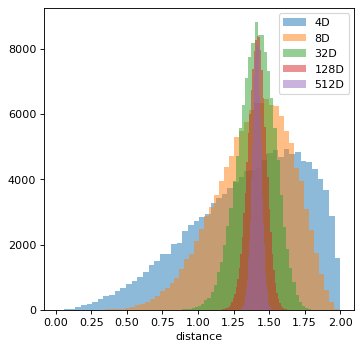

In [45]:
from sklearn.preprocessing import normalize


def draw_distributions_norm(dims, **kwargs):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    axes = fig.gca()
    for n_dims in dims: 
        axes.hist(distances(normalize(sample(n_dims))), bins=50, alpha=0.5, label=f"{n_dims}D")
    axes.legend()
    axes.set_xlabel("distance")
    return fig

fig = draw_distributions_norm([4, 8, 32, 128, 512])

As we can see all normalized distances essentially become the same!

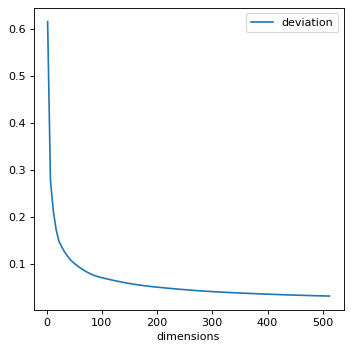

In [53]:
import scipy.stats

def draw_avg_std(dims, points=100):
    avgs, stds = [], []
    for dim in dims:
        avg, std = scipy.stats.norm.fit(distances(normalize(sample(dim))))
        avgs.append(avg)
        stds.append(std)
    avgs = np.array(avgs)
    stds = np.array(stds)
    
    x = np.linspace(dims.min(), dims.max(), num=points, endpoint=True)
    smooth_avgs = interp1d(dims, avgs,  kind='linear', fill_value="extrapolate")
    smooth_stds = interp1d(dims, stds, kind='quadratic', fill_value="extrapolate")
    
    fig = plt.figure(figsize=(5, 5), dpi=80)
    axes = fig.gca()
    axes.plot(x, smooth_stds(x), label="deviation")
    axes.legend()
    axes.set_xlabel("dimensions")
    return fig

fig = draw_avg_std(np.array([2, 4, 8, 16, 32, 64, 128, 256, 400, 512]))

## Credits

The example is borrowed from the _UMAP Uniform Manifold Approximation and Projection for Dimension Reduction | SciPy 2018_ talk by [Leland McInnes](https://github.com/lmcinnes).

Time code: `11:15`

In [5]:
YouTube("nq6iPZVUxZU")